In [1]:
import numpy as np
import torch
from torch.distributions import MultivariateNormal

In [2]:
n = int(1e6)
mu_x = 0
mu_y=0
mu_xp = 0
mu_yp = 0
sigma_x = 175e-9
sigma_y = 175e-9
sigma_xp = 2e-7
sigma_yp = 2e-7
sigma_s = 1e-3
sigma_p = 1e-3
cor_x = 0
cor_y = 0
cor_s = 0
energy = 1e8

In [3]:
mean = torch.Tensor([mu_x, mu_xp, mu_y, mu_yp, 0, 0])
cov = torch.Tensor([[sigma_x**2,       cor_x,          0,           0,          0,          0],
                    [     cor_x, sigma_xp**2,          0,           0,          0,          0],
                    [         0,           0, sigma_y**2,       cor_y,          0,          0],
                    [         0,           0,      cor_y, sigma_yp**2,          0,          0],
                    [         0,           0,          0,           0, sigma_s**2,      cor_s],
                    [         0,           0,          0,           0,      cor_s, sigma_p**2]])

In [4]:
cov

tensor([[3.0625e-14, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 4.0000e-14, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 3.0625e-14, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e-14, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e-06, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e-06]])

In [5]:
particles = torch.ones((n, 7))

In [6]:
distribution = MultivariateNormal(mean, covariance_matrix=cov)

In [7]:
distribution

MultivariateNormal(loc: torch.Size([6]), covariance_matrix: torch.Size([6, 6]))

In [9]:
particles[:,:6] = distribution.sample((n,))

In [12]:
particles.shape

torch.Size([100, 7])

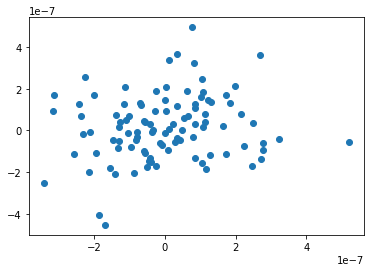

In [13]:
import matplotlib.pyplot as plt

plt.scatter(particles[:,0], particles[:,2])
plt.show()

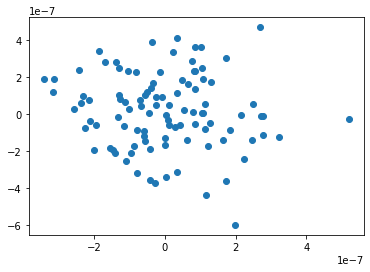

In [14]:
plt.scatter(particles[:,0], particles[:,1])
plt.show()

In [11]:
nptest = np.random.multivariate_normal(mean, cov, size=n)